100%|██████████| 500/500 [00:08<00:00, 56.80it/s, loss 0.0527]


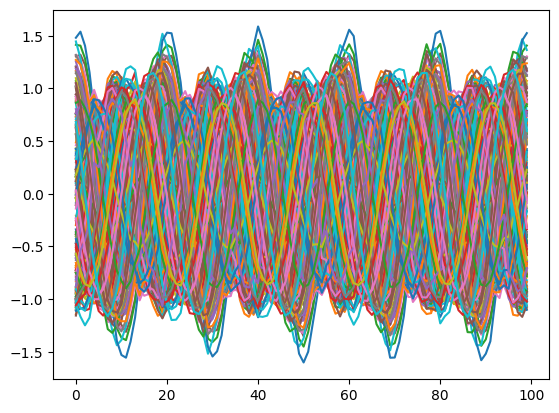

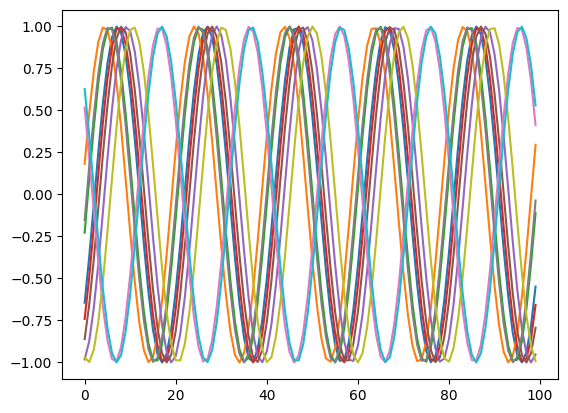

In [24]:
import torch
import torch.nn as nn
from infopath.losses import hard_trial_matching_loss
import matplotlib.pyplot as plt
from geomloss import SamplesLoss
from tqdm import tqdm

# The dataset
T = 100
K = 200
t = torch.arange(T)
data = torch.zeros(K, T)
for i, phi in enumerate(torch.arange(K)/K*360):
    data[i] = torch.cos(2*3.14*100*t + phi)

# The model
mlp = nn.Sequential(nn.Linear(10, 1000), nn.ReLU(), nn.Linear(1000, T))
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.1, weight_decay=0.)
sink_loss = SamplesLoss(loss="sinkhorn", p=1, blur=0.01)

# The training 
epochs = 500
pbar = tqdm(range(epochs))
for i in pbar:
    inp = torch.randn(200, 10)
    out = mlp(inp)
    loss = hard_trial_matching_loss(data, out)
    # loss = sink_loss(data, out)
    loss.backward()
    optimizer.step()
    mlp.zero_grad()
    pbar.set_postfix_str(f"loss {loss.item():.4f}")

# Visualization
inp = torch.randn(200, 10)
out = mlp(inp)
plt.figure()
plt.plot(out.cpu().detach().T)
plt.figure()
plt.plot(data.cpu().detach()[torch.randint(K, size=(10,))].T)

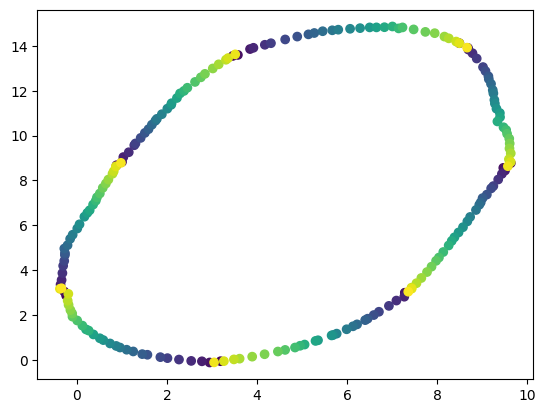

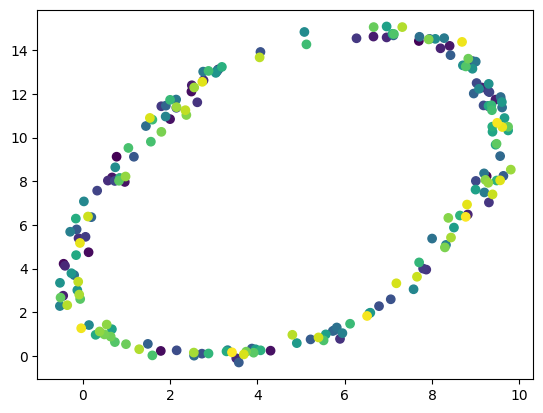

In [25]:
from umap import UMAP

umap = UMAP(random_state=1).fit(data)

x = umap.transform(data)
y = umap.transform(out.detach().cpu())

plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=torch.arange(K)/K*360)
plt.figure()
plt.scatter(y[:, 0], y[:, 1], c=torch.arange(out.shape[0])/out.shape[0]*360)